In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
import os

In [2]:
# DATA

# import

file_path = os.path.join(r'D:\FMF magisterij\Matematika z računalnikom', f'test_weather_data.csv')
data = pd.read_csv(file_path)

data.head()

,index,time,airT,rainIntensity,rH,solarRadiance,windDir,windSpeed,pressure
0,1133,2020-11-05 12:15:00+00:00,10.9,0.0,76.4,111.4,233.0,1.13,99010.0
1,1134,2020-11-05 12:20:00+00:00,10.9,0.0,76.7,115.5,245.0,1.17,99010.0
2,1135,2020-11-05 12:25:00+00:00,11.0,0.0,75.5,117.2,243.0,1.64,99010.0
3,1136,2020-11-05 12:30:00+00:00,11.0,0.0,76.0,118.8,226.0,1.54,99000.0
4,1137,2020-11-05 12:35:00+00:00,11.0,0.0,74.2,120.4,221.0,1.90,99000.0


In [3]:
# Rename columns to match the old format
new_data = data.rename(columns={
    'time': 'acquisition_timestamp',
    'airT': 'AMBIENT_TEMPERATURE',
    'rainIntensity': 'RAIN_INTENSITY',
    'rH': 'RELATIVE_HUMIDITY',
    'solarRadiance': 'SOLAR_RADIATION_INTENSITY',
    'windDir': 'WIND_DIRECTION',
    'windSpeed': 'WIND_SPEED',
    'pressure': 'AIR_PRESSURE'
})

# Convert acquisition_timestamp to datetime
new_data['acquisition_timestamp'] = pd.to_datetime(new_data['acquisition_timestamp'], utc=True)


# Drop the 'index' column
new_data = new_data.drop(columns=['index'])

# Set the 'acquisition_timestamp' as the index
new_data = new_data.set_index('acquisition_timestamp')

# Rearrange columns to match the old format
new_data = new_data[[
    'AIR_PRESSURE', 'AMBIENT_TEMPERATURE', 'RAIN_INTENSITY', 
    'RELATIVE_HUMIDITY', 'SOLAR_RADIATION_INTENSITY', 
    'WIND_DIRECTION', 'WIND_SPEED'
]]

# Display the reformatted DataFrame
new_data.head()


,AIR_PRESSURE,AMBIENT_TEMPERATURE,RAIN_INTENSITY,RELATIVE_HUMIDITY,SOLAR_RADIATION_INTENSITY,WIND_DIRECTION,WIND_SPEED
acquisition_timestamp,,,,,,,
2020-11-05 12:15:00+00:00,99010.0,10.9,0.0,76.4,111.4,233.0,1.13
2020-11-05 12:20:00+00:00,99010.0,10.9,0.0,76.7,115.5,245.0,1.17
2020-11-05 12:25:00+00:00,99010.0,11.0,0.0,75.5,117.2,243.0,1.64
2020-11-05 12:30:00+00:00,99000.0,11.0,0.0,76.0,118.8,226.0,1.54
2020-11-05 12:35:00+00:00,99000.0,11.0,0.0,74.2,120.4,221.0,1.90


In [4]:



# ambient temperature
temperature = new_data[['AMBIENT_TEMPERATURE']]
print(temperature)

# count the NaN values
nan_count_temperature = temperature['AMBIENT_TEMPERATURE'].isna().sum()
print(f'Nan Count Temperature :',nan_count_temperature)
# there are no NaN values

# check for missing measurements (skipped times)
complete_range = pd.date_range(start=temperature.index.min(), end=temperature.index.max(), freq='5T')
missing_timestamps = complete_range.difference(temperature.index)
print(f'Length of missing timestamps :',len(missing_timestamps))
#print(complete_range)
df_complete_range = pd.DataFrame(index=complete_range)
print(f'Data Complete Range :',len(df_complete_range))
# we have 271508 measurements, there are 5112 missing measurment out of 276620 time steps in the whole time range

# merge all the air pressure measurements with all the time steps. missing measurment will be NaN values for now
temperature_incomplete = df_complete_range.merge(temperature, left_index=True, right_index=True, how='left')
# print(temperature_incomplete)
temperature_incomplete.isna().sum() # okay

# missing measurements are filled with the next available measurement
temperature_all = temperature_incomplete.bfill()
print(f'Temperature all :',temperature_all)
print(f'Sum of na Tempertaure all :',temperature_all.isna().sum()) # okay

str(temperature_all.index.dtype) # okay

                           AMBIENT_TEMPERATURE
acquisition_timestamp                         
2020-11-05 12:15:00+00:00                 10.9
2020-11-05 12:20:00+00:00                 10.9
2020-11-05 12:25:00+00:00                 11.0
2020-11-05 12:30:00+00:00                 11.0
2020-11-05 12:35:00+00:00                 11.0
...                                        ...
2023-05-31 21:35:00+00:00                 15.1
2023-05-31 21:40:00+00:00                 15.0
2023-05-31 21:45:00+00:00                 15.1
2023-05-31 21:50:00+00:00                 15.0
2023-05-31 21:55:00+00:00                 14.9

[265803 rows x 1 columns]
Nan Count Temperature : 6
Length of missing timestamps : 4170
Data Complete Range : 269973
Temperature all :                            AMBIENT_TEMPERATURE
2020-11-05 12:15:00+00:00                 10.9
2020-11-05 12:20:00+00:00                 10.9
2020-11-05 12:25:00+00:00                 11.0
2020-11-05 12:30:00+00:00                 11.0
2020-11-05 12:35:0

'datetime64[ns, UTC]'

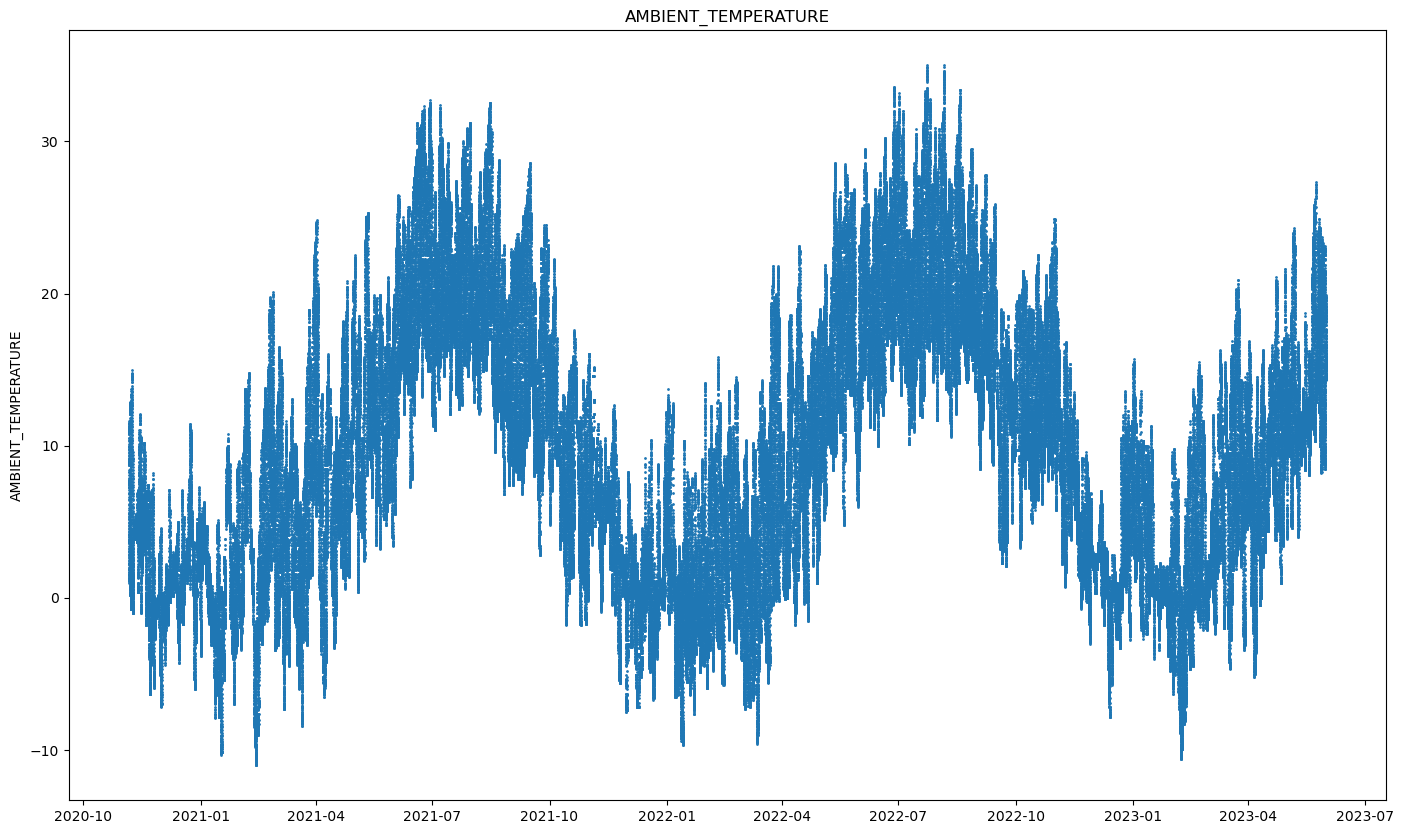

In [5]:
# plot 'AMMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(temperature_all.index, temperature_all['AMBIENT_TEMPERATURE'],s=1)
ax.set_ylabel('AMBIENT_TEMPERATURE')  
ax.set_title('AMBIENT_TEMPERATURE')  
plt.show()

                           AMBIENT_TEMPERATURE
2020-11-05 12:00:00+00:00            11.000000
2020-11-05 13:00:00+00:00            11.375000
2020-11-05 14:00:00+00:00            11.000000
2020-11-05 15:00:00+00:00            10.166667
2020-11-05 16:00:00+00:00             9.233333
...                                        ...
2023-05-31 17:00:00+00:00            17.608333
2023-05-31 18:00:00+00:00            16.600000
2023-05-31 19:00:00+00:00            15.808333
2023-05-31 20:00:00+00:00            15.458333
2023-05-31 21:00:00+00:00            15.116667

[22498 rows x 1 columns]


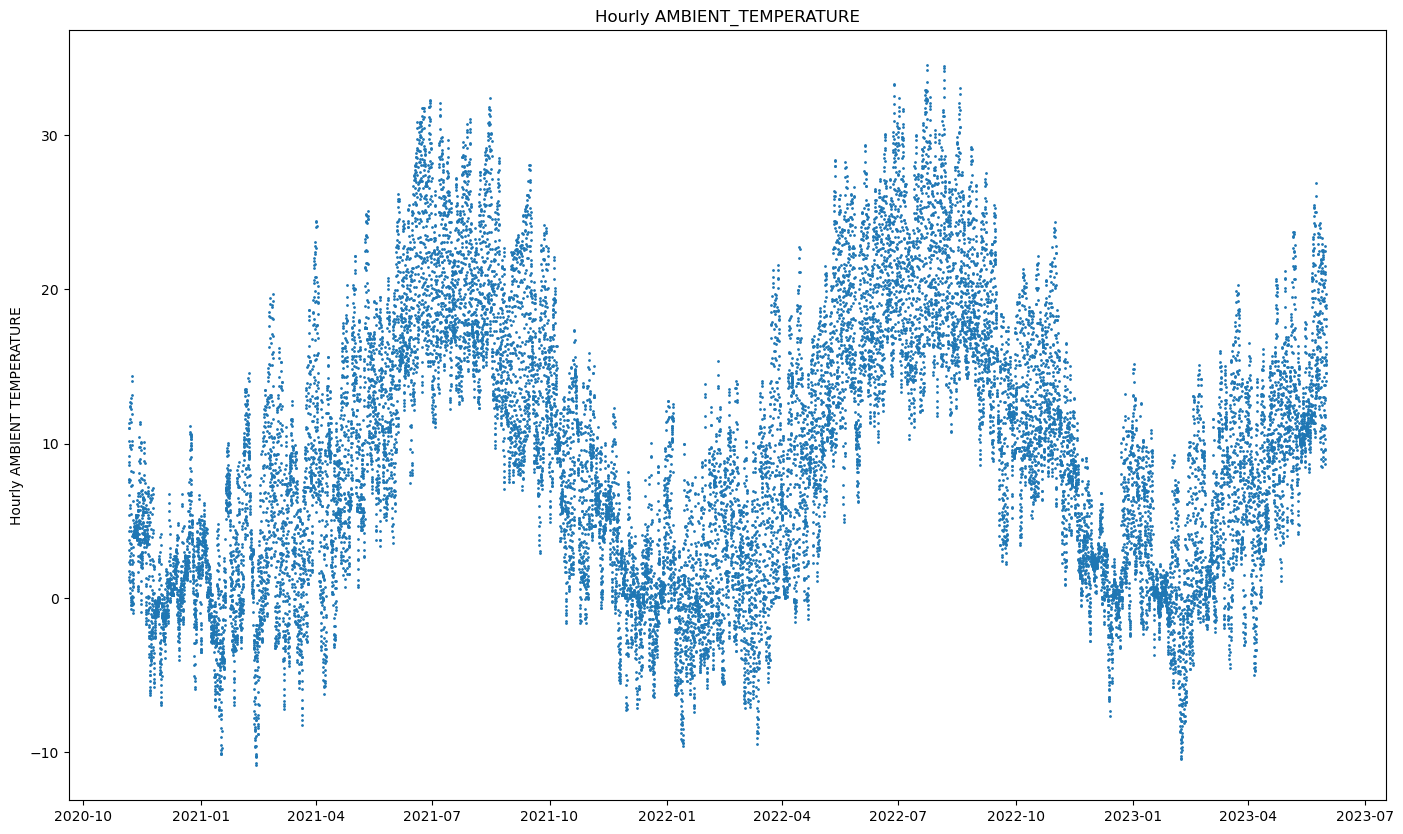

In [6]:
# hourly data
# sum the values for each hour and take the mean

str(temperature_all.index.dtype) # okay
temperature_hourly = temperature_all.resample('H').mean()
print(temperature_hourly)

# plot hourly 'AMBIENT_TEMPERATURE'
fig, ax = plt.subplots(figsize=(17, 10))
ax.scatter(temperature_hourly.index, temperature_hourly['AMBIENT_TEMPERATURE'],s=1)
ax.set_ylabel('Hourly AMBIENT TEMPERATURE')  
ax.set_title('Hourly AMBIENT_TEMPERATURE')  
plt.show()

In [7]:
# fit the old models to the new data 


from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Define both fits
order_1=(2,1,5)
order_2=(4,1,2)


                                SARIMAX Results                                
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                22498
Model:                  ARIMA(2, 1, 5)   Log Likelihood              -26152.678
Date:                 Wed, 22 May 2024   AIC                          52321.356
Time:                         02:52:20   BIC                          52385.525
Sample:                     11-05-2020   HQIC                         52342.231
                          - 05-31-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9132      0.002   1048.333      0.000       1.910       1.917
ar.L2         -0.9787      0.002   -550.325      0.000      -0.982      -0.975
ma.L1         -1.2529      0.004   -284.225 

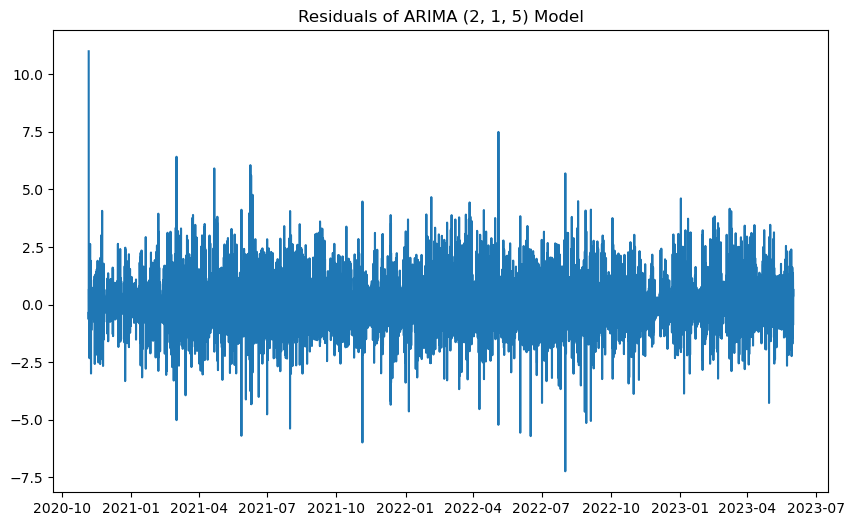

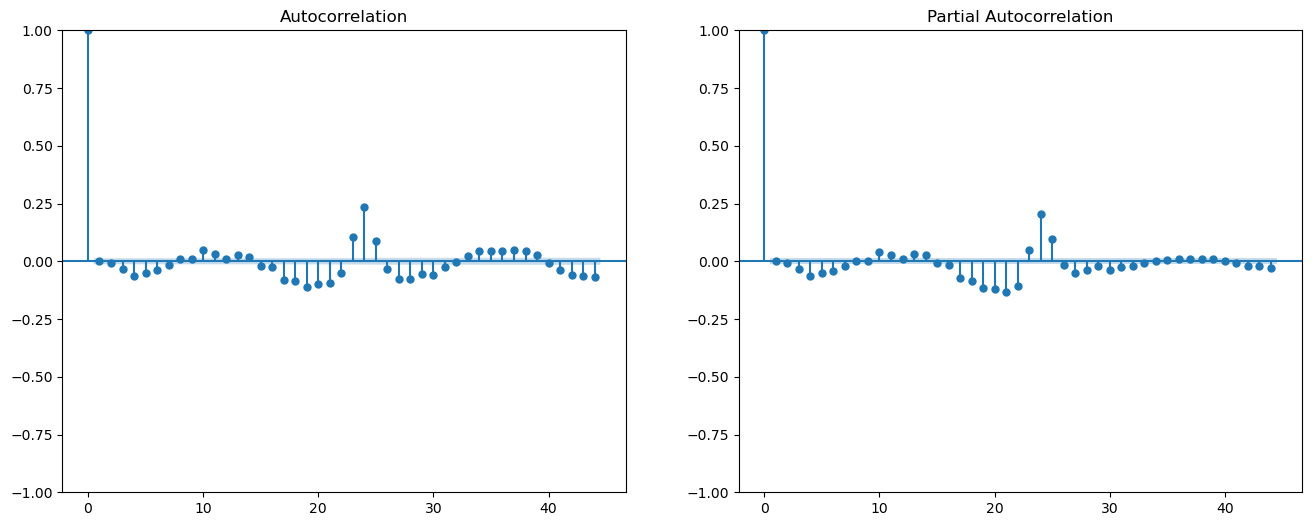

In [8]:
# fit the model number 1
best_model_1 = ARIMA(temperature_hourly, order=order_1)   # change order accordingly
best_fit_1 = best_model_1.fit()

# summary of the best model
print(best_fit_1.summary())

# residuals of the best model
residuals_best_1 = best_fit_1.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_1)
plt.title(f'Residuals of ARIMA {order_1} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_1, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_1, ax=ax[1], alpha=0.05)
plt.show()

                                SARIMAX Results                                
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                22498
Model:                  ARIMA(4, 1, 2)   Log Likelihood              -26112.554
Date:                 Wed, 22 May 2024   AIC                          52239.109
Time:                         02:52:35   BIC                          52295.257
Sample:                     11-05-2020   HQIC                         52257.375
                          - 05-31-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5137      0.006    423.126      0.000       2.502       2.525
ar.L2         -2.3439      0.012   -192.258      0.000      -2.368      -2.320
ar.L3          1.0006      0.012     83.904 

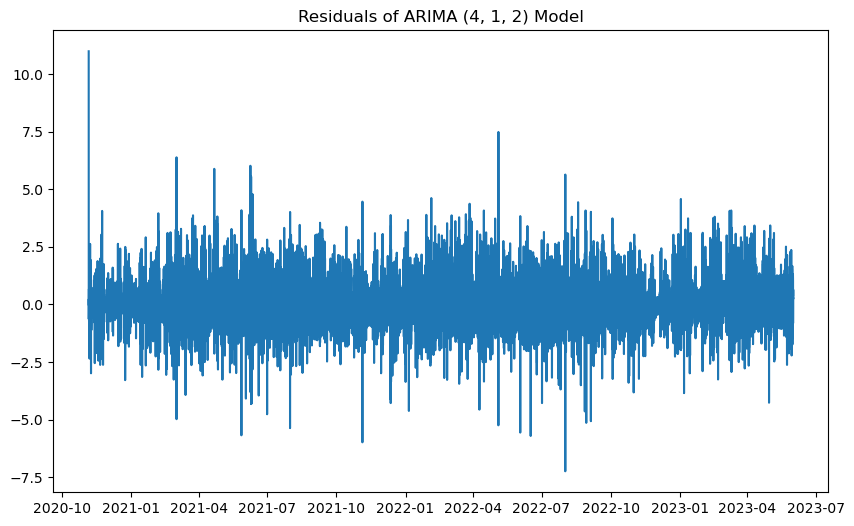

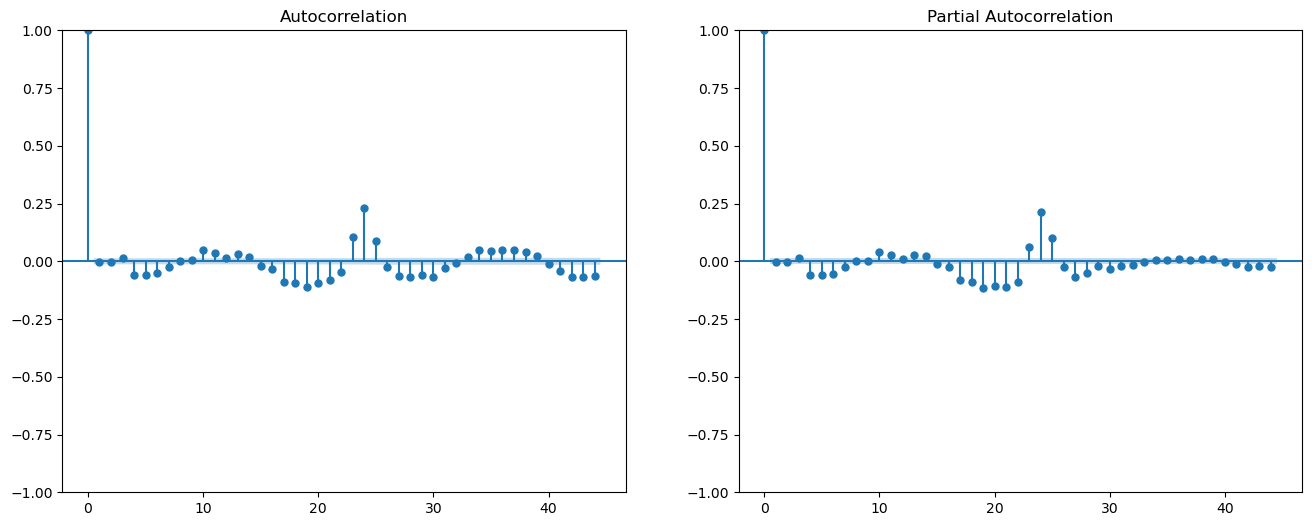

In [9]:
# fit the model number 2
best_model_2 = ARIMA(temperature_hourly, order=order_2)   # change order accordingly
best_fit_2 = best_model_2.fit()

# summary of the best model
print(best_fit_2.summary())

# residuals of the best model
residuals_best_2 = best_fit_2.resid

# plot residuals
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(residuals_best_2)
plt.title(f'Residuals of ARIMA {order_2} Model')
plt.show()

# plot ACF and PACF of the residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(residuals_best_2, ax=ax[0], alpha=0.05)
plot_pacf(residuals_best_2, ax=ax[1], alpha=0.05)
plt.show()

In [10]:
# data for 2020, 2021, 2022
# fit the best model to this data
# 2 best ARIMAs: (2,1,5) and (4,1,2) - try both
# forecast the next 24 hours 
# compare forecast from ARIMA and simple model with actual values (maybe 2 simple models)
# plot forecasts, plot errors

temperature_20_21_22 = temperature_hourly.loc[(temperature_hourly.index.year == 2020) | (temperature_hourly.index.year == 2021) | (temperature_hourly.index.year == 2022) , 'AMBIENT_TEMPERATURE']
print(temperature_20_21_22)

2020-11-05 12:00:00+00:00    11.000000
2020-11-05 13:00:00+00:00    11.375000
2020-11-05 14:00:00+00:00    11.000000
2020-11-05 15:00:00+00:00    10.166667
2020-11-05 16:00:00+00:00     9.233333
                               ...    
2022-12-31 19:00:00+00:00     8.108333
2022-12-31 20:00:00+00:00     6.558333
2022-12-31 21:00:00+00:00     5.650000
2022-12-31 22:00:00+00:00     4.925000
2022-12-31 23:00:00+00:00     4.316667
Freq: H, Name: AMBIENT_TEMPERATURE, Length: 18876, dtype: float64


In [11]:
# 1st simple model
# average of the previous 3 days is the value for the next day

def last_3_days_average(data, forecasted_steps):
    # Forecasts the next values based on the average of the last 3 days at the same time.
    forecast = []

    for step in range(forecasted_steps):

        next_time_step = data.index[-1] + pd.Timedelta(hours=1) # finds out the next time step
        
        last_3_days = [
            next_time_step - pd.Timedelta(days=i) for i in range(1, 4)     # gets the same hour from the last 3 days
        ]
        
        values = [data[data.index == dt].values for dt in last_3_days] # extracts the values at the same hour from the last 3 days
        values = [val[0] if len(val) > 0 else np.nan for val in values]
        
        forecast_value = np.nanmean(values) # mean of the last 3 days
        
        forecast.append(forecast_value)
        
        data = pd.concat([data, pd.Series([forecast_value], index=[next_time_step])]) # adds the forecasted value to the data for the next iteration

    return pd.Series(forecast, index=[data.index[-forecasted_steps + i] for i in range(forecasted_steps)])

last_3_days_average(temperature_20_21_22, 24)

last_3_temperature = last_3_days_average(temperature_20_21_22, 24)


In [12]:
# 2nd simple model
# today's measurement is tomorrow's forecast

def today_is_tomorrow(data, forecasted_steps):

    forecast = []

    for step in range(forecasted_steps):

        next_time_step = data.index[-1] + pd.Timedelta(hours=1)
        
        same_hour_last_day = next_time_step - pd.Timedelta(days=1)
        
        forecast_value = data.loc[same_hour_last_day]
        
        forecast.append(forecast_value)
        
        data = pd.concat([data, pd.Series([forecast_value], index=[next_time_step])])

    return pd.Series(forecast, index=[data.index[-forecasted_steps + i] for i in range(forecasted_steps)])

today_is_tomorrow(temperature_20_21_22, 24)

today_is_tomorrow_temperature = today_is_tomorrow(temperature_20_21_22, 24)


According to the old data test of AIC, ARIMA (4,1,2) is preferred.  

In [13]:
# ARIMA(4,1,2) (2nd fit)

# change p,d,q to the best found

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


# fit
model_412 = ARIMA(temperature_20_21_22, order=(4,1,2))
fit_412 = model_412.fit()

# summary of the fit
print(fit_412.summary())

# ARIMA forecast for 1 day (24 steps) into the future

forecast_result_412 = fit_412.get_forecast(steps=24)
forecast_values_412 = forecast_result_412.predicted_mean
conf_int_412 = forecast_result_412.conf_int()

print("Forecasted values:", forecast_values_412)
print("95% Confidence intervals of forecasts:", conf_int_412)

                                SARIMAX Results                                
Dep. Variable:     AMBIENT_TEMPERATURE   No. Observations:                18876
Model:                  ARIMA(4, 1, 2)   Log Likelihood              -22085.918
Date:                 Wed, 22 May 2024   AIC                          44185.836
Time:                         02:52:49   BIC                          44240.756
Sample:                     11-05-2020   HQIC                         44203.855
                          - 12-31-2022                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.5034      0.007    370.879      0.000       2.490       2.517
ar.L2         -2.3090      0.014   -170.287      0.000      -2.336      -2.282
ar.L3          0.9580      0.013     73.122 

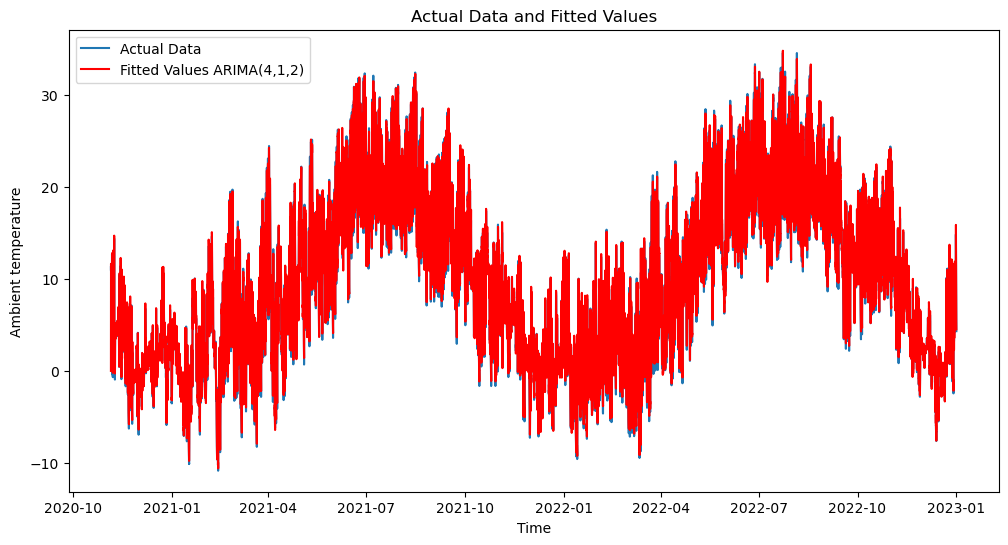

In [14]:
# plot actual data and fitted values
# change p,d,q to the best found

# fitted values
fitted_values_412 = fit_412.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(temperature_20_21_22.index, temperature_20_21_22, label='Actual Data')
plt.plot(temperature_20_21_22.index, fitted_values_412, color='red', label='Fitted Values ARIMA(4,1,2)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ambient temperature')
plt.title('Actual Data and Fitted Values')
plt.show()

# this doesn't tell us much - see histogram and error evaluations

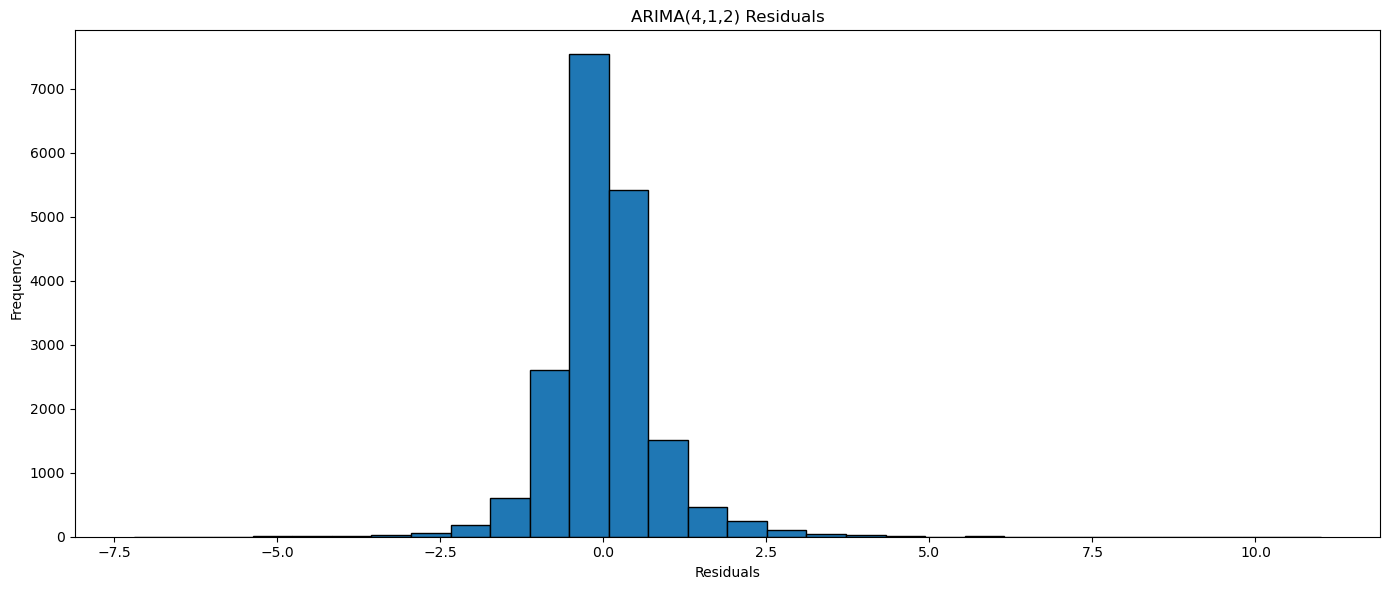

In [15]:
# comparison of the histograms


residuals_412 = fit_412.resid

plt.figure(figsize=(14, 6))
plt.hist(residuals_412, bins=30, edgecolor='k')
plt.title('ARIMA(4,1,2) Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')



plt.tight_layout()
plt.show()


In [16]:
# statistical test and metricts to determine which model is better

import math 
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# mean of the residuals (should be 0)

mean2 = np.mean(residuals_412)
#print(mean1, mean2)

# AIC (already done above) - writte about AIC in the report - also see model fit output

aic2 = fit_412.aic
#print(aic1, aic2)


# Ljung-Box test for autocorrelation - see model fit output

# BIC - see model fit output

Mean Absolute Error: 0.5310097917106027
Mean Squared Error: 0.6142734943268429


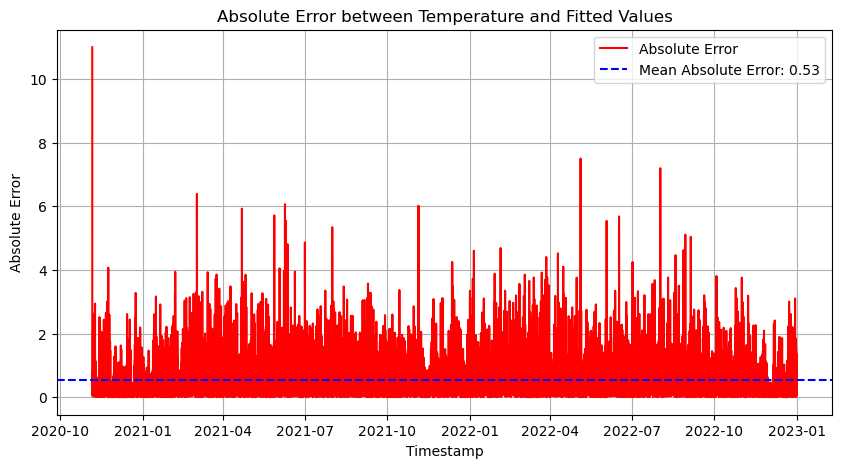

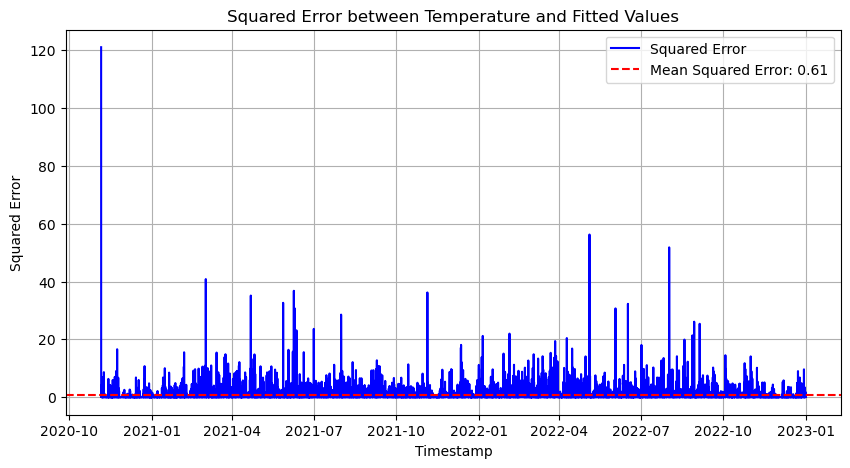

In [17]:
# absolute error comparison - actual data vs fitted model data

def calculate_errors(data, model): 
      # model are fitted values of a chosen model
  if isinstance(data, pd.Series) and isinstance(model, pd.Series):
        absolute_error = (data - model).abs()
        squared_error = (data - model) ** 2
  elif isinstance(data, np.ndarray) and isinstance(model, np.ndarray):
        absolute_error = np.abs(data - model)
        squared_error = (data - model) ** 2
  errors = pd.DataFrame({
        'absolute_error': absolute_error,
        'squared_error': squared_error
  })

  return errors

# (4,1,2) is the preferred, lets compare this data with actual data
# actual data - temperature_20_21_22
# fitted values data - fitted_values_412 

errors = calculate_errors(temperature_20_21_22, fitted_values_412 )

# mean errors
mean_absolute_error = errors['absolute_error'].mean()
mean_squared_error = errors['squared_error'].mean()
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

# plot of the absolute error
plt.figure(figsize=(10, 5))
plt.plot(errors['absolute_error'], label='Absolute Error', color='red')
plt.axhline(y=mean_absolute_error, color='blue', linestyle='--', label=f'Mean Absolute Error: {mean_absolute_error:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Absolute Error')
plt.title('Absolute Error between Temperature and Fitted Values')
plt.legend()
plt.grid(True)
plt.show()

# plot of the squared error
plt.figure(figsize=(10, 5))
plt.plot(errors['squared_error'], label='Squared Error', color='blue')
plt.axhline(y=mean_squared_error, color='red', linestyle='--', label=f'Mean Squared Error: {mean_squared_error:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Squared Error')
plt.title('Squared Error between Temperature and Fitted Values')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
    

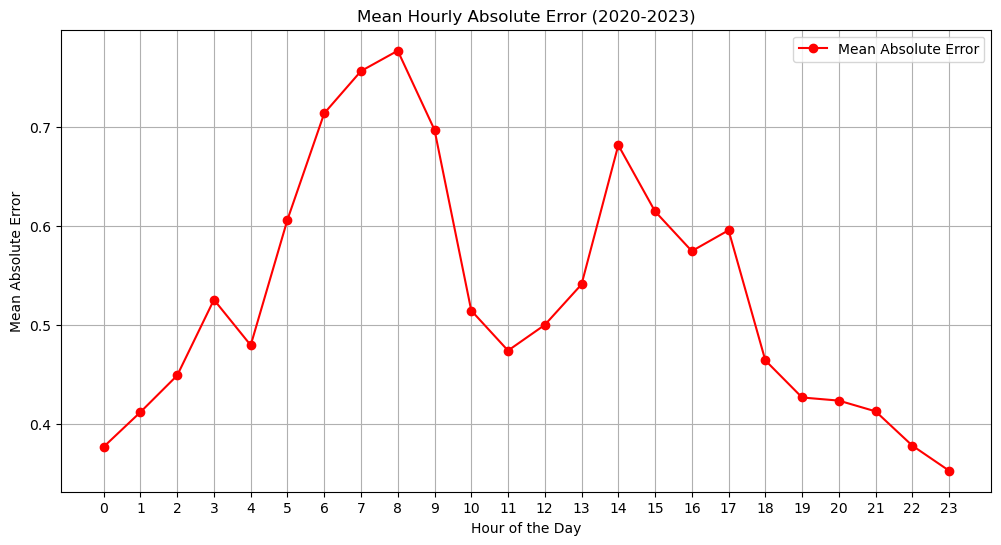

Hour
0     0.376736
1     0.411819
2     0.448858
3     0.525349
4     0.479388
5     0.606239
6     0.713692
7     0.756356
8     0.776909
9     0.697010
10    0.514412
11    0.473963
12    0.499911
13    0.540861
14    0.681496
15    0.614578
16    0.574490
17    0.595530
18    0.464054
19    0.426592
20    0.423434
21    0.412566
22    0.377907
23    0.352603
Name: absolute_error, dtype: float64


In [18]:
# mean hourly absolute errors

errors['Hour'] = errors.index.hour

# mean
mean_absolute_errors_by_hour = errors.groupby('Hour')['absolute_error'].mean()

# plot
plt.figure(figsize=(12, 6))
plt.plot(mean_absolute_errors_by_hour.index, mean_absolute_errors_by_hour, label='Mean Absolute Error', marker='o', color='red')

plt.xlabel('Hour of the Day')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Hourly Absolute Error (2020-2023)')
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(range(24))
plt.show()

print(mean_absolute_errors_by_hour)

In [19]:
# actual measurements for 1 day (24 steps) into the future
temp_hourly = temperature_hourly['AMBIENT_TEMPERATURE']
actual_values_temperature_23 = temp_hourly['2023'].head(24)
print(actual_values_temperature_23)

2023-01-01 00:00:00+00:00     4.025000
2023-01-01 01:00:00+00:00     3.491667
2023-01-01 02:00:00+00:00     3.416667
2023-01-01 03:00:00+00:00     3.050000
2023-01-01 04:00:00+00:00     2.850000
2023-01-01 05:00:00+00:00     3.441667
2023-01-01 06:00:00+00:00     2.950000
2023-01-01 07:00:00+00:00     2.991667
2023-01-01 08:00:00+00:00     4.675000
2023-01-01 09:00:00+00:00     8.166667
2023-01-01 10:00:00+00:00    12.466667
2023-01-01 11:00:00+00:00    14.008333
2023-01-01 12:00:00+00:00    15.191667
2023-01-01 13:00:00+00:00    14.833333
2023-01-01 14:00:00+00:00    12.250000
2023-01-01 15:00:00+00:00    10.633333
2023-01-01 16:00:00+00:00     9.266667
2023-01-01 17:00:00+00:00     7.525000
2023-01-01 18:00:00+00:00     6.283333
2023-01-01 19:00:00+00:00     5.375000
2023-01-01 20:00:00+00:00     4.425000
2023-01-01 21:00:00+00:00     3.466667
2023-01-01 22:00:00+00:00     2.991667
2023-01-01 23:00:00+00:00     2.383333
Freq: H, Name: AMBIENT_TEMPERATURE, dtype: float64


                              Actual  ARIMA(4,1,2)  \
2023-01-01 00:00:00+00:00   4.025000      4.066537   
2023-01-01 01:00:00+00:00   3.491667      4.144374   
2023-01-01 02:00:00+00:00   3.416667      4.472792   
2023-01-01 03:00:00+00:00   3.050000      4.992056   
2023-01-01 04:00:00+00:00   2.850000      5.656107   
2023-01-01 05:00:00+00:00   3.441667      6.419225   
2023-01-01 06:00:00+00:00   2.950000      7.230888   
2023-01-01 07:00:00+00:00   2.991667      8.037505   
2023-01-01 08:00:00+00:00   4.675000      8.786585   
2023-01-01 09:00:00+00:00   8.166667      9.430823   
2023-01-01 10:00:00+00:00  12.466667      9.931323   
2023-01-01 11:00:00+00:00  14.008333     10.259920   
2023-01-01 12:00:00+00:00  15.191667     10.400644   
2023-01-01 13:00:00+00:00  14.833333     10.350346   
2023-01-01 14:00:00+00:00  12.250000     10.118477   
2023-01-01 15:00:00+00:00  10.633333      9.726066   
2023-01-01 16:00:00+00:00   9.266667      9.203971   
2023-01-01 17:00:00+00:00   

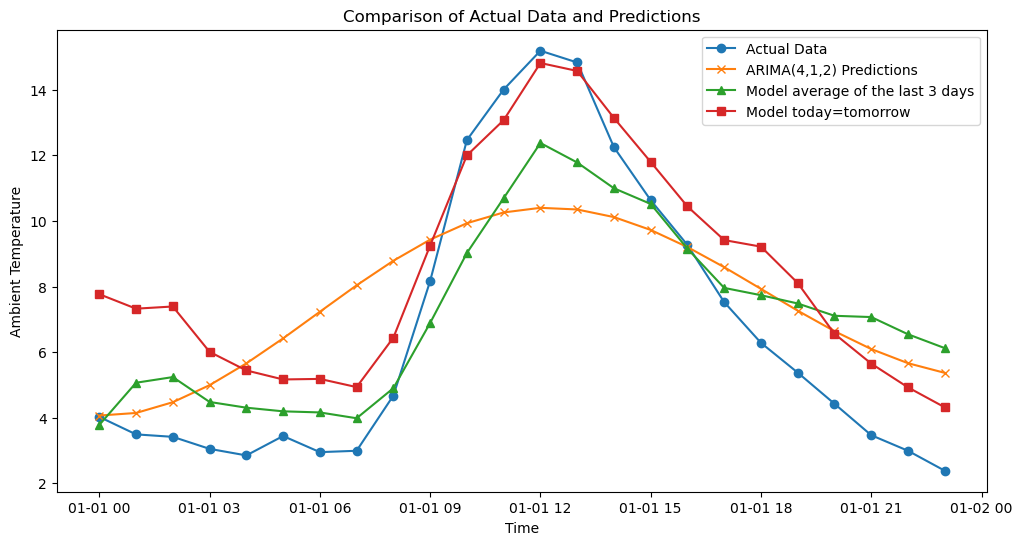

In [20]:
# comparing the models with the actual data
# change p,d,q to the best found

comparison_temperature = pd.DataFrame({
    'Actual': actual_values_temperature_23,
    'ARIMA(4,1,2)': forecast_values_412,
    'Model average of the last 3 days': last_3_temperature,
    'Model today=tomorrow': today_is_tomorrow_temperature
})

print(comparison_temperature)

plt.figure(figsize=(12,6))

plt.plot(comparison_temperature.index, comparison_temperature['Actual'], label='Actual Data', marker='o')
plt.plot(comparison_temperature.index, comparison_temperature['ARIMA(4,1,2)'], label='ARIMA(4,1,2) Predictions', marker='x')
plt.plot(comparison_temperature.index, comparison_temperature['Model average of the last 3 days'], label='Model average of the last 3 days', marker='^')
plt.plot(comparison_temperature.index, comparison_temperature['Model today=tomorrow'], label='Model today=tomorrow', marker='s')

plt.xlabel('Time')
plt.ylabel('Ambient Temperature')
plt.title('Comparison of Actual Data and Predictions')
plt.legend()
plt.show()

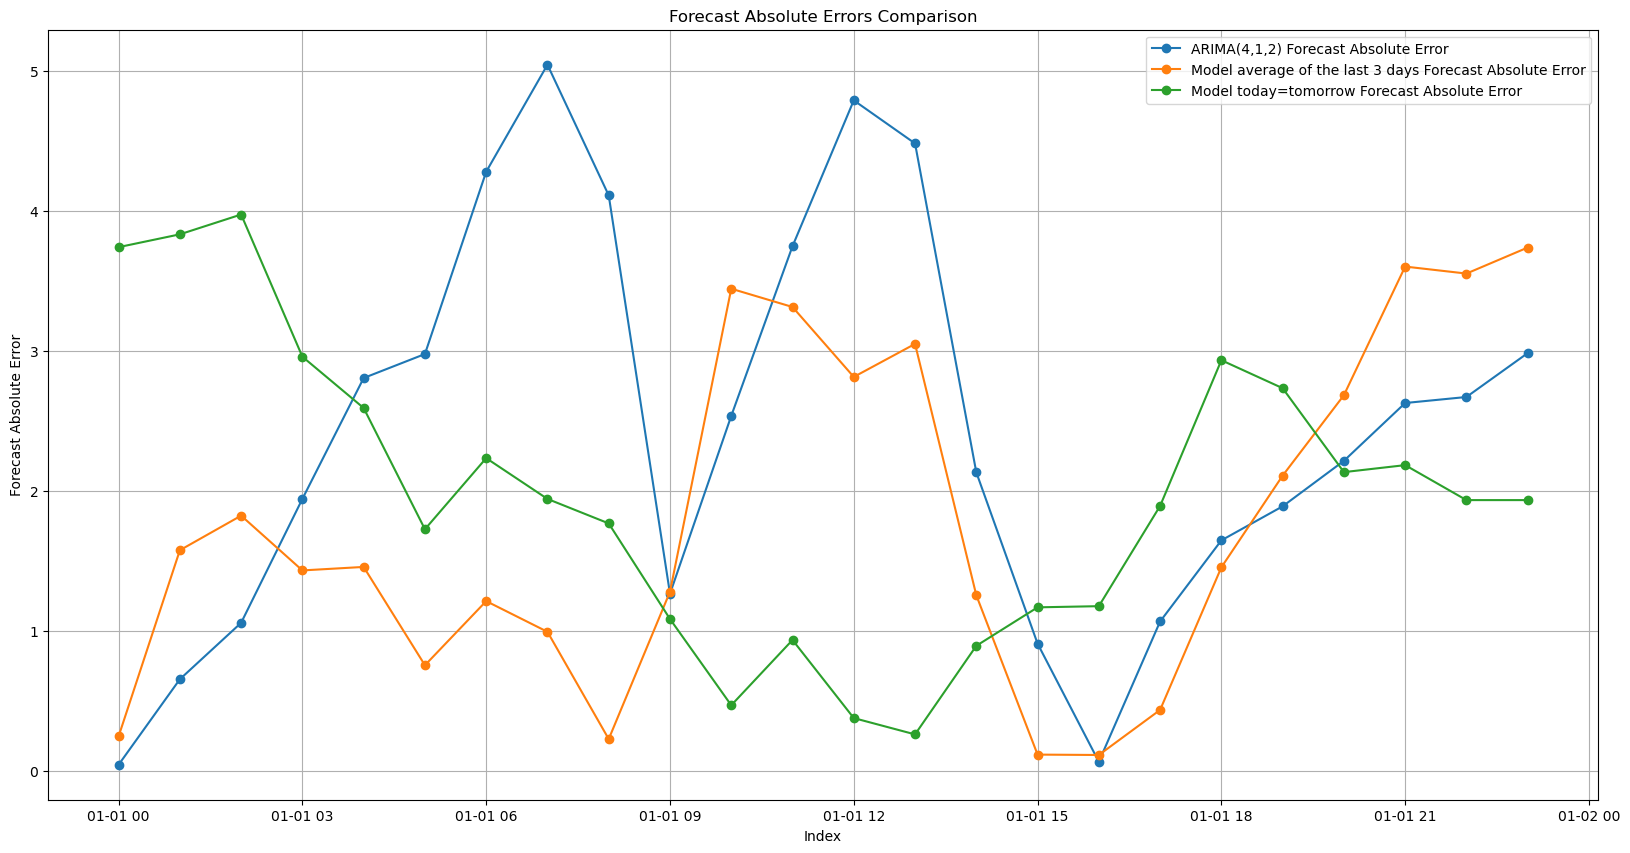

ARIMA(4,1,2) Forecast Absolute Error                        2.413916
Model average of the last 3 days Forecast Absolute Error    1.777431
Model today=tomorrow Forecast Absolute Error                1.952431
dtype: float64


In [21]:
# 4 models' predictions compared to the actual data

# absolute errors of all the modela
forecast_absolute_errors = pd.DataFrame()
for column in comparison_temperature.columns:
    if column != 'Actual':
        forecast_absolute_errors[column + ' Forecast Absolute Error'] = (comparison_temperature['Actual'] - comparison_temperature[column]).abs()

# plot
plt.figure(figsize=(20, 10))
for column in forecast_absolute_errors.columns:
    plt.plot(forecast_absolute_errors[column], label=column, marker='o')

plt.xlabel('Index')
plt.ylabel('Forecast Absolute Error')
plt.title('Forecast Absolute Errors Comparison')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# values 
#print(forecast_absolute_errors)

# mean errors
print(forecast_absolute_errors.mean())
